## Imports

In [ ]:
import numpy as np
import random
import math
import pandas as pd
import seaborn as sns
from scipy.stats import norm,t,f
import statistics
import matplotlib.pyplot as plt

## Data Cleaning

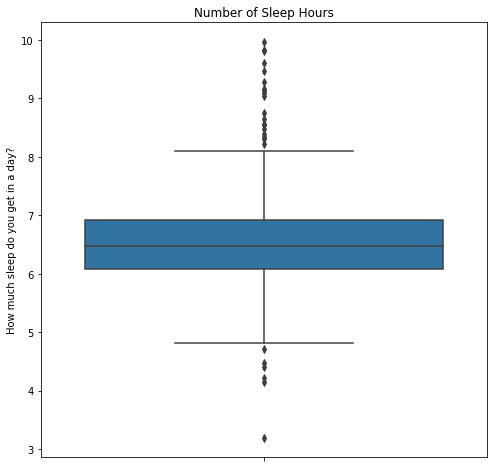

,How much sleep do you get in a day?,TOS
count,132.000000,132.000000
mean,6.641714,15.201515
std,1.256754,5.004600
min,3.199589,1.000000
25%,6.080173,13.000000
50%,6.472127,14.000000
75%,6.926733,16.000000
max,9.958100,24.500000


In [ ]:
data = pd.read_csv('/content/Factors effecting sleep (Responses) - Form Responses 1.csv')
df = pd.DataFrame(data,columns=['How many times in a day, do you have caffeinated drinks or Tea?','How much sleep do you get in a day?','At what time do you sleep?'	])
# df = df.replace(["6-7 hrs","more than 8 hours","4-5 hrs","5-6 hrs","less than 4 hours"], [random.random()/10, random.randint(80, 100)/10, random.randrange(40, 50)/10, random.randrange(50, 60)/10, random.randrange(30, 40)/10], regex=True)
# df.describe()
# df['sleep hours'] = [random.seed(i) if df.loc[i,'How much sleep do you get in a day?'] == "6-7 hrs" random.randint(6,7) for i in range(df.count())]
l = []
for i in range(df.shape[0]):
  random.seed(i) 
  if df.loc[i,'How much sleep do you get in a day?'] == "6-7 hrs":
    l.append(random.uniform(6,7))
  elif df.loc[i,'How much sleep do you get in a day?'] == "more than 8 hours":
    l.append(random.uniform(8,10))
  elif df.loc[i,'How much sleep do you get in a day?'] == "4-5 hrs":
    l.append(random.uniform(4,5))
  elif df.loc[i,'How much sleep do you get in a day?'] == "5-6 hrs":
    l.append(random.uniform(5,6))
  elif df.loc[i,'How much sleep do you get in a day?'] == "less than 4 hours":
    l.append(random.uniform(3,4))
df['How much sleep do you get in a day?'] = l
def ifPM(s):
  if s == 'AM':
    return 12
  else:
    return 0
df['TOS'] = [
                int(df.loc[i,'At what time do you sleep?'].split(':')[0])+
                int(df.loc[i,'At what time do you sleep?'].split(':')[1])/60 +
                ifPM((df.loc[i,'At what time do you sleep?'].split(':')[2]).split()[1]) for i in range(df.shape[0])
            ]
df.drop(['At what time do you sleep?'], inplace = True, axis = 1)
df_all = pd.DataFrame(df['How much sleep do you get in a day?'])
plt.figure(figsize=(8,8))
ax = sns.boxplot( y="How much sleep do you get in a day?", data=df_all)
plt.title('Number of Sleep Hours')
plt.show()
df.describe()

## Data and description for different amount of caffiene intakes

In [ ]:
df0 = df.loc[df['How many times in a day, do you have caffeinated drinks or Tea?']=='No caffeine']
df1 = df.loc[df['How many times in a day, do you have caffeinated drinks or Tea?']=='1 time, or less']
df2 = df.loc[df['How many times in a day, do you have caffeinated drinks or Tea?']=='2 times a day']
df3 = df.loc[df['How many times in a day, do you have caffeinated drinks or Tea?']=='3 times a day']
df4 = df.loc[df['How many times in a day, do you have caffeinated drinks or Tea?']=='4 or more than 4 times a day']
dff = pd.concat([df1,df3,df4])

In [ ]:
n1 = df0.describe().iloc[0,1]
m1 = df0.describe().iloc[1,1]
s1 = df0.describe().iloc[2,1]
N1 = df0.describe().iloc[0,0]
M1 = df0.describe().iloc[1,0]
S1 = df0.describe().iloc[2,0]
df0.describe()

,How much sleep do you get in a day?,TOS
count,46.000000,46.000000
mean,6.798549,15.278623
std,1.455183,5.180778
min,4.209851,10.000000
25%,5.942871,11.500000
50%,6.524550,13.291667
75%,8.097821,15.750000
max,9.819538,24.500000


In [ ]:
df1.describe()

,How much sleep do you get in a day?,TOS
count,39.000000,39.000000
mean,6.465055,15.526496
std,1.212115,5.046817
min,3.199589,2.000000
25%,6.112352,13.000000
50%,6.497537,14.000000
75%,6.897980,15.500000
max,9.811279,24.500000


In [ ]:

df2.describe()


,How much sleep do you get in a day?,TOS
count,34.000000,34.000000
mean,6.578082,14.367647
std,0.937139,4.885521
min,4.878099,1.000000
25%,6.214373,13.000000
50%,6.430458,14.000000
75%,6.738214,15.875000
max,9.958100,24.000000


In [ ]:
df3.describe()

,How much sleep do you get in a day?,TOS
count,8.000000,8.000000
mean,7.114196,15.218750
std,1.704296,4.203395
min,4.712343,11.000000
25%,6.074998,12.625000
50%,6.773000,14.250000
75%,8.386601,16.312500
max,9.463062,24.000000


In [ ]:
df4.describe()

,How much sleep do you get in a day?,TOS
count,5.000000,5.00000
mean,6.253492,17.60000
std,0.601097,5.85662
min,5.328701,13.00000
25%,6.112957,13.00000
50%,6.414744,14.00000
75%,6.445139,24.00000
max,6.965919,24.00000


In [ ]:
dff.loc[:,'How many times in a day, do you have caffeinated drinks or Tea?'] = 'yep'
dff.describe()
dff_copy = pd.concat([df0,dff])
n2 = dff.describe().iloc[0,1]
m2 = dff.describe().iloc[1,1]
s2 = dff.describe().iloc[2,1]
N2 = dff.describe().iloc[0,0]
M2 = dff.describe().iloc[1,0]
S2 = dff.describe().iloc[2,0]
dff.describe()

,How much sleep do you get in a day?,TOS
count,52.000000,52.000000
mean,6.544580,15.678526
std,1.259272,4.950354
min,3.199589,2.000000
25%,6.107303,13.000000
50%,6.489392,14.000000
75%,6.915474,16.500000
max,9.811279,24.500000


In [ ]:
df['TOS'].describe()

count    132.000000
mean      15.201515
std        5.004600
min        1.000000
25%       13.000000
50%       14.000000
75%       16.000000
max       24.500000
Name: TOS, dtype: float64

## Normal distribution graph and confidence intervals

### Graph

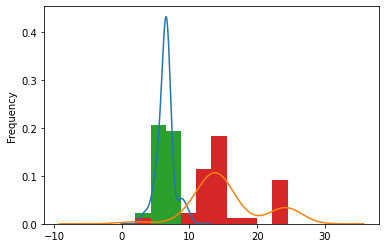

In [ ]:
x_axis = np.arange(4.6, 9.4, 0.01)
fig, ax = plt.subplots()
df1.plot.kde(ax=ax, legend=False)
ax.grid(axis='y')
df1.plot.hist(density=True, ax=ax,legend = False)
# df3.plot.hist()
# df3.plot.kde()

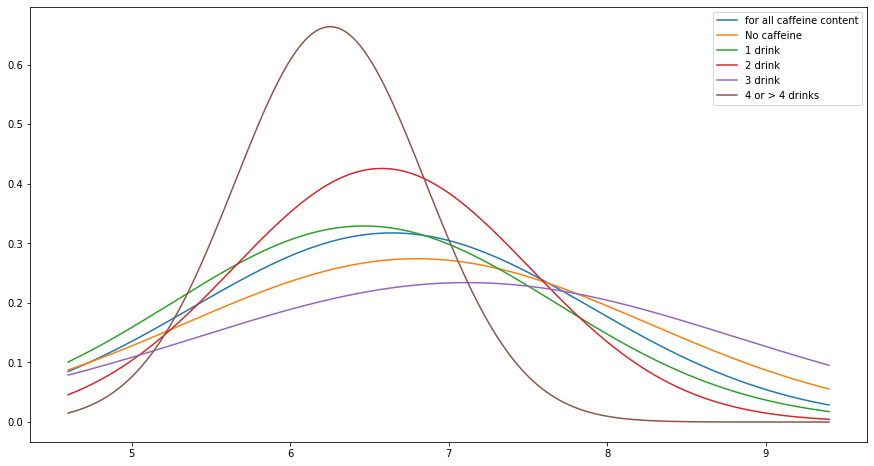

In [ ]:
x_axis = np.arange(4.6, 9.4, 0.01)
plt.figure(figsize=(15,8))
plt.plot(x_axis, norm.pdf(x_axis, df["How much sleep do you get in a day?"].mean(), df["How much sleep do you get in a day?"].std()),label='for all caffeine content')
plt.plot(x_axis, norm.pdf(x_axis, df0["How much sleep do you get in a day?"].mean(), df0["How much sleep do you get in a day?"].std()),label='No caffeine')
plt.plot(x_axis, norm.pdf(x_axis, df1["How much sleep do you get in a day?"].mean(), df1["How much sleep do you get in a day?"].std()),label='1 drink')
plt.plot(x_axis, norm.pdf(x_axis, df2["How much sleep do you get in a day?"].mean(), df2["How much sleep do you get in a day?"].std()),label='2 drink')
plt.plot(x_axis, norm.pdf(x_axis, df3["How much sleep do you get in a day?"].mean(), df3["How much sleep do you get in a day?"].std()),label='3 drink')
plt.plot(x_axis, norm.pdf(x_axis, df4["How much sleep do you get in a day?"].mean(), df4["How much sleep do you get in a day?"].std()),label='4 or > 4 drinks')
plt.legend()
plt.show()

### Confidence Interval

In [ ]:

def ci(x,confidence):
  m = x.mean() 
  s = x.std() 
  dof = len(x)-1 
  t_crit = np.abs(t.ppf((1-confidence)/2,dof))
  # print(t_crit)
  # print(m)
  # print(s)
  return (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))
print("We can say with 95% confidence that the number of hours" 
                        +" of sleep is in the interval",
                         ci(np.array(df['How much sleep do you get in a day?']),0.95))

print("We can say with 95% confidencethat the number of hours of sleep of a person"
                        +" who " + "\033[1m" + "doesnot take any caffeine daily" + "\033[0;0m" + " is in the interval",
                         ci(np.array(df0['How much sleep do you get in a day?']),0.95))

print("We can say with 95% confidencethat the number of hours of sleep of a person"
                        +" who " + "\033[1m" + "take one caffeinated drink a day" + "\033[0;0m" + " is in the interval",
                         ci(np.array(df1['How much sleep do you get in a day?']),0.95))

print("We can say with 95% confidencethat the number of hours of sleep of a person"
                        +" who " + "\033[1m" + "take two caffeinated drinks a day" + "\033[0;0m" + " is in the interval",
                         ci(np.array(df2['How much sleep do you get in a day?']),0.95))

print("We can say with 95% confidencethat the number of hours of sleep of a person"
                        +" who " + "\033[1m" + "take three caffeinated drinks a day" + "\033[0;0m" + " is in the interval",
                         ci(np.array(df3['How much sleep do you get in a day?']),0.95))

print("We can say with 95% confidencethat the number of hours of sleep of a person"
                        +" who " + "\033[1m" + "take greater than three caffeinated drinks a day" + "\033[0;0m" + " is in the interval",
                         ci(np.array(df4['How much sleep do you get in a day?']),0.95))

We can say with 95% confidence that the number of hours of sleep is in the interval (6.426142462239211, 6.85728482903702)
We can say with 95% confidencethat the number of hours of sleep of a person who doesnot take any caffeine daily is in the interval (6.371135830008422, 7.225961847009575)
We can say with 95% confidencethat the number of hours of sleep of a person who take one caffeinated drink a day is in the interval (6.077203257483464, 6.85290723792892)
We can say with 95% confidencethat the number of hours of sleep of a person who take two caffeinated drinks a day is in the interval (6.255942897939486, 6.900220276132138)
We can say with 95% confidencethat the number of hours of sleep of a person who take three caffeinated drinks a day is in the interval (5.78139223315505, 8.446999249309597)
We can say with 95% confidencethat the number of hours of sleep of a person who take greater than three caffeinated drinks a day is in the interval (5.585926367101903, 6.921057674177979)


## Sea born box-plot

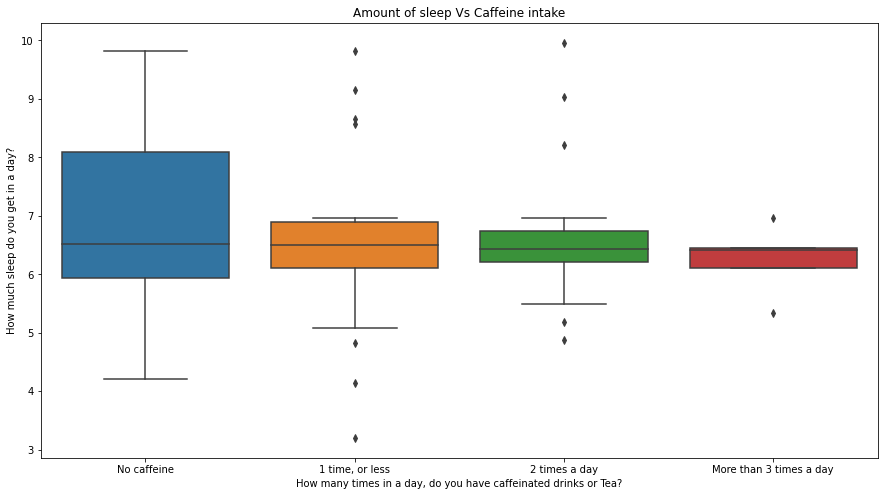

In [ ]:
plt.figure(figsize=(15,8))
df_copy = df.copy()
df_copy.replace(['4 or more than 4 times a day'],['More than 3 times a day'], inplace=True)
for i in range(df_copy.shape[0]):
  if df_copy.loc[i,'How many times in a day, do you have caffeinated drinks or Tea?'] == '4 or more than 4 times a day':
    df_copy.loc[i,'How many times in a day, do you have caffeinated drinks or Tea?'] == 'More than 3 times a day'
# df_copy.head(100)
ax = sns.boxplot(x="How many times in a day, do you have caffeinated drinks or Tea?",
                    y="How much sleep do you get in a day?", data=df_copy,
                    order = ["No caffeine","1 time, or less","2 times a day","More than 3 times a day"])
plt.title('Amount of sleep Vs Caffeine intake')
plt.show()

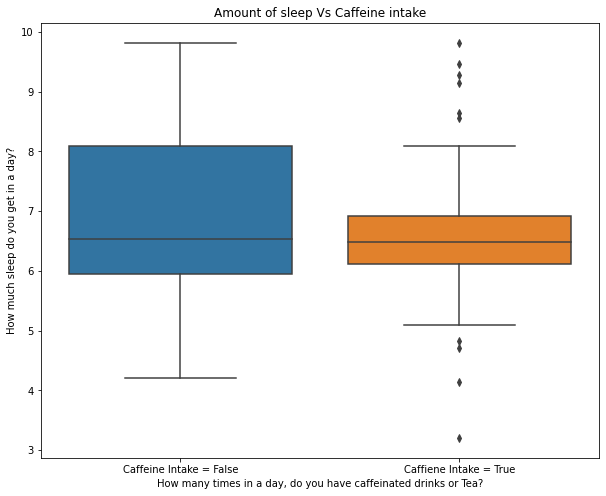

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="How many times in a day, do you have caffeinated drinks or Tea?",
                    y="How much sleep do you get in a day?", data=dff_copy,
                    order = ["No caffeine","yep"])
plt.title('Amount of sleep Vs Caffeine intake')
ax.set_xticklabels(['Caffeine Intake = False' , 'Caffiene Intake = True'])
plt.show()

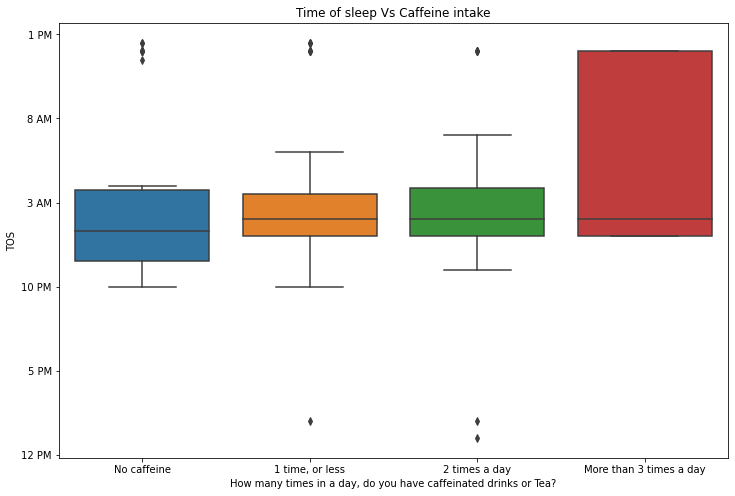

In [ ]:
# plt.figure(figsize=(10,8))
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.boxplot(x="How many times in a day, do you have caffeinated drinks or Tea?",
                    y="TOS", data=df_copy,
                    order = ["No caffeine","1 time, or less","2 times a day","More than 3 times a day"])
plt.title('Time of sleep Vs Caffeine intake')
ax.set_yticklabels([' ', '12 PM' , '5 PM' , '10 PM' , '3 AM', '8 AM', '1 PM'])
plt.show()

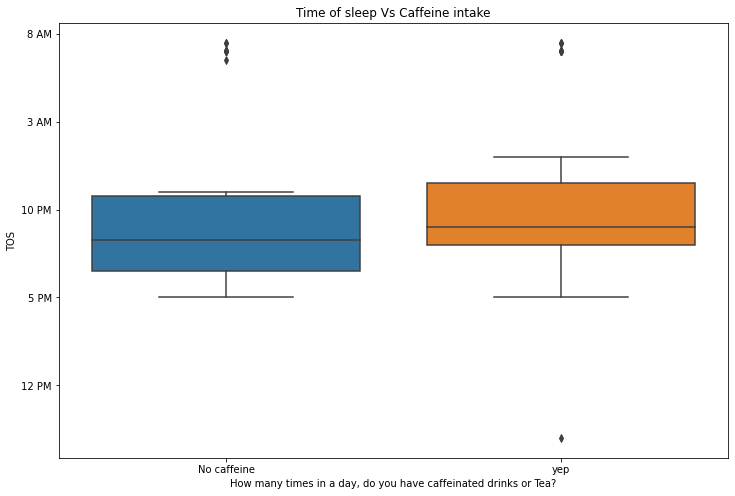

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.boxplot(x="How many times in a day, do you have caffeinated drinks or Tea?",
                    y="TOS", data=dff_copy,
                    order = ["No caffeine","yep"])
plt.title('Time of sleep Vs Caffeine intake')
ax.set_yticklabels([' ', '12 PM' , '5 PM' , '10 PM' , '3 AM', '8 AM', '1 PM'])
plt.show()

## Hypothesis and Hypothesis Testing

#### $\text{Questions for 5% i.e., α = 0.05}$ :
1.   Is IITH students sleep atlest $6\text{ hrs}$ on an average ?
2.   Find out if students who take caffeine sleeps late ?
3.   Find out if students who take caffeine sleep less ?



In [ ]:
# H0 :  m <= 6
# Ha :  m  > 6
alpha = 0.01
test_statistic = (df['How much sleep do you get in a day?'].mean()-6)/(df['How much sleep do you get in a day?'].std()/math.sqrt(131))
degoffre = 131
print(df['How much sleep do you get in a day?'].mean())
print(df['How much sleep do you get in a day?'].std())
print("test statistic is ",test_statistic)
print("t is ",abs(t.ppf(alpha,degoffre)))
if test_statistic > abs(t.ppf(alpha,degoffre)):
  print(f"With a test statistic of {test_statistic} and critical value of {abs(t.ppf(alpha,degoffre))} at a {100*alpha}% level of significance, we have enough statistical evidence to reject the null hypothesis.")
  print("So, there is enough evidence to conclude that IITH students are getting more than 6hrs of sleep a day.")
else:
  print(f"With a test statistic of {test_statistic} and critical value of {abs(t.ppf(alpha,degoffre))} at a {100*alpha}% level of significance, we do not have enough statistical evidence to reject the null hypothesis.")

6.641713645638115
1.2567541582377577
test statistic is  5.844220473599824
t is  2.35515039642141
With a test statistic of 5.844220473599824 and critical value of 2.35515039642141 at a 1.0% level of significance, we have enough statistical evidence to reject the null hypothesis.
So, there is enough evidence to conclude that IITH students are getting more than 6hrs of sleep a day.


In [ ]:
# Hypothesis testing for 1st question
# H0 : m1 - m2 >= 0
# Ha : m1 - m2 < 0 
alpha = 0.05
test_staistic = (m1-m2)/math.sqrt((pow(s1,2)/n1) + (pow(s2,2)/n2))
def degreesOfFreedom(s1, s2, n1, n2):
    s1 = s1**2
    s2 = s2**2
    df = (s1 / n1 + s2 / n2)**2 / ((s1 / n1)**2 / (n1 - 1) + (s2 / n2)**2 / (n2 - 1))
    return(df)
degf = round(degreesOfFreedom(s1,s2,n1,n2)) 
print(degf)
print("test statistic is ",test_staistic)
print("t is ",abs(t.ppf(alpha,degf)))
if test_staistic <= -abs(t.ppf(alpha,degf)) :
  print("Students who take caffeine sleep late than those who don't take caffeine")
else:
  print("The evidence is insufficient to conclude that those who take caffeine sleeps late than those who don't take caffeine")

93
test statistic is  -0.3893836510105908
t is  1.6614036736367146
The evidence is insufficient to conclude that those who take caffeine sleeps late than those who don't take caffeine


In [ ]:
# Hypothesis testing for 2nd question
# H0 : M1 - M2 <= 0
# Ha : M1 - M2 > 0 
alpha = 0.05
test_staistic = (M1-M2)/math.sqrt((pow(S1,2)/n1) + (pow(S2,2)/n2))
deggf = round(degreesOfFreedom(S1,S2,n1,n2))
print(M1)
print(M2)
print(n1)
print(n2)
print(S1)
print(S2)
print(deggf) 
print("test statistic is ",test_staistic)
print("t is ",abs(t.ppf(alpha,deggf)))
if test_staistic <= -abs(t.ppf(alpha,deggf)) :
  print("Students who take caffeine sleep less than those who don't take caffeine")
else:
  print("The evidence is insufficient to conclude that those who take caffeine sleeps less than those who take caffeine")

6.798548838508996
6.544580397953841
46.0
52.0
1.455182795444837
1.2592721889121334
90
test statistic is  0.9180487079966966
t is  1.661961083996941
The evidence is insufficient to conclude that those who take caffeine sleeps less than those who take caffeine


In [ ]:
## H0 = S1**2 <= S2**2
## Ha = S1**2  > S2**2
alpha = 0.2
test_staistic = S1**2 / S2**2
print("test statistic is ",test_staistic)
print("F is ",1/f.ppf(alpha,n1-1,n2-1))
print(n1 - 1)
print(n2 - 1)
if test_staistic >= 1/f.ppf(alpha,n1-1,n2-1) :
  print("Sleeping hours of those who take caffeine are more predectible(less variance) when compared with those who don't take caffeine")
else:
  print("The evidence is insufficient to conclude ")

test statistic is  1.3353523615097638
F is  1.2806973982256524
45.0
51.0
Sleeping hours of those who take caffeine are more predectible(less variance) when compared with those who don't take caffeine


In [ ]:
print(degreesOfFreedom(0.252241,0.4361906,82,50))

69.27785458996388
